In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

parkinsonsData = pd.read_csv('Parkinsson disease.csv')

In [55]:
#split the dataset into features and target variable
parkinsonsData = parkinsonsData.drop('name', axis=1)
parkinsonsData

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [56]:
parkinsonsData.isnull().values.any()

False

In [57]:
parkinsonsData.dtypes

#y output in status int64

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [58]:
num_cols = len(parkinsonsData.columns)
print("Number of columns: ", num_cols)

Number of columns:  23


# Spliting Data into training and testing sets

In [59]:
x = parkinsonsData[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE' ]]
y = parkinsonsData[['status']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

# KNeighbors Classifier

In [60]:
#created an instance of KNeighborsClassifer with k=5
knn = KNeighborsClassifier(n_neighbors=5)

In [61]:
#fit the training data
knn.fit(x_train, y_train)

C:\Users\Wakab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

# Testing Data

In [91]:
y_pred = knn.predict(x_test)
y_trainPred = knn.predict(x_train)

In [92]:
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy score for k=5: {acc_score}")

Accuracy score for k=5: 0.8717948717948718


In [64]:
for k in [3, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    print(f"Accuracy score for k={k}: {acc_score}")

Accuracy score for k=3: 0.8974358974358975
Accuracy score for k=7: 0.8974358974358975
Accuracy score for k=9: 0.8717948717948718


C:\Users\Wakab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Wakab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Wakab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [65]:
accuracy = accuracy_score(y_test, y_pred)
TrainAcc = accuracy_score(y_train, y_trainPred)
f_score = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print('F-score:', f_score)
print('AUC_ROC:', auc_roc)
print('Testing Accuracy score:', accuracy)
print('Training Accuracy score:', TrainAcc)


F-score: 0.9152542372881356
AUC_ROC: 0.8155172413793103
Testing Accuracy score: 0.8717948717948718
Training Accuracy score: 0.8846153846153846


In [67]:
y_proba = knn.predict_proba(x_test)[:, 1]

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

In [69]:
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc}")

AUC: 0.9224137931034484


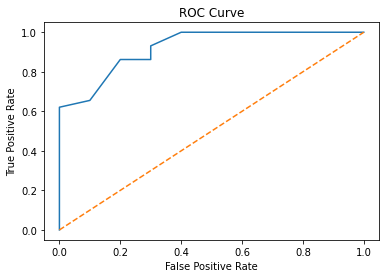

In [70]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [72]:
lr_model.fit(x_train, y_train)

C:\Users\Wakab\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Wakab\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Comparing Accuracy Scores

In [85]:
ypredTest2 = lr_model.predict(x_test)
accuracyTest2 = accuracy_score(y_test, ypredTest2)
ypredTrain2 = lr_model.predict(x_train)
accuracyTrain2 = accuracy_score(y_train, ypredTrain2)
f2_score = f1_score(y_test, ypredTest2)
auc2_roc = roc_auc_score(y_test, ypredTest2)
print("Accuracy for the model on the training data is:", accuracyTrain2.round(3))
print("Accuracy for model on testing data is:", accuracyTest2.round(3))
print('F-score:', f2_score)
print('AUC_ROC:', auc2_roc)

Accuracy for the model on the training data is: 0.865
Accuracy for model on testing data is: 0.897
F-score: 0.9333333333333333
AUC_ROC: 0.8327586206896551


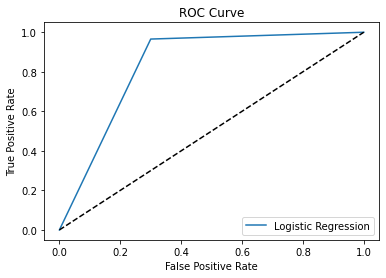

In [87]:
LRt, LRm, _ = roc_curve(y_test, ypredTest2)
plt.plot(LRt, LRm, label = 'Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Decision Tree Classifier

In [77]:
clf = DecisionTreeClassifier()
#Train the classifier on the training data
clf.fit(x_train, y_train)
ypredTest = clf.predict(x_test)

In [81]:
ypredTest3 = clf.predict(x_test)
accuracyTest3 = accuracy_score(y_test, ypredTest3)
ypredTrain3 = clf.predict(x_train)
accuracyTrain3 = accuracy_score(y_train, ypredTrain3)
f3_score = f1_score(y_test, ypredTest3)
auc3_roc = roc_auc_score(y_test, ypredTest3)
print("Accuracy for the model on the training data is:", accuracyTrain3.round(3))
print("Accuracy for model on testing data is:", accuracyTest3.round(1))
print('F-score:', f3_score)
print('AUC_ROC:', auc3_roc)

Accuracy for the model on the training data is: 1.0
Accuracy for model on testing data is: 0.9
F-score: 0.912280701754386
AUC_ROC: 0.8482758620689657


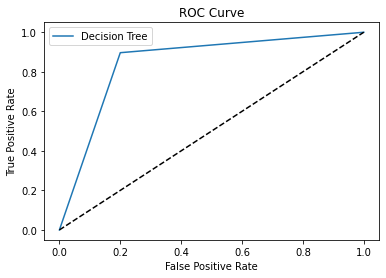

In [82]:
DT, DTr, _ = roc_curve(y_test, ypredTest3)
plt.plot(DT, DTr, label = 'Decision Tree')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

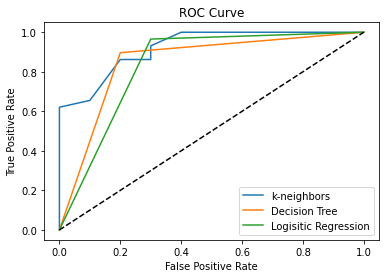

In [93]:
#we then finally come here were our roc curves will be plotted for all of our models
plt.plot(fpr, tpr, label='k-neighbors')
plt.plot(DT,DTr, label="Decision Tree")
plt.plot(LRt,LRm, label="Logisitic Regression")
#this stuff is just our labels and numerals
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
#so looking at our roc curve what can we can tell, well we can see by looking at our roc curve that all of our models had 
#amazing results with their predicting ability however the logistic regression model managed to outperform the rest of the models
#and coming in second its seems like botht the Naive bayes and SVM both take second place and finally in last place our K nearest model
#was out performed by the rest of the models